In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from numba import njit
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import random
import time
import os

In [2]:
# EXAMPLE GIVEN
def fun(a,b):
    #print("Process number:", os.getpid())
    time.sleep(1) # So that it takes a bit longer...
    return a+b
N=10
a=np.linspace(0,1,N)
b=np.linspace(0,1,N)
a,b


(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]))

In [3]:


%%time 

aplusb = list(tqdm(map(fun, a,b),total=N))  # Using map function to do the summation by creating tuples of a and b element buy element
print(np.array(aplusb))



  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]
CPU times: user 36.6 ms, sys: 7.16 ms, total: 43.7 ms
Wall time: 10 s


In [4]:
multiprocessing.cpu_count()  # Checks the number of CPUs on my machine

14

In [5]:


CPUS = 10

# Now, this is much faster!
parmap = pathos.multiprocessing.ProcessingPool(CPUS).imap  # Use this to create new map,returns a map object




/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/1748623382.py:26: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_48522/456984204.py:27: RuntimeWarni

In [6]:
%%time
aplusb = list(tqdm(parmap(fun, a,b),total=N)) # Use the new map with N CPUs

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 25.1 ms, sys: 10.9 ms, total: 36 ms
Wall time: 1.02 s


In [7]:
# I CAN SELECT THE NUMBER OF CPUs THAT I WANT TO USE TO RUN MY CODE!!!
# Now, I want to check which CPU is doing what, I need to do like this 


def whosrunning(i):
    return os.getpid()

In [8]:
ids = list(map(whosrunning, range(10))) # First case, find the CPUs that simple map uses (no selection by my part)
print(ids)
print(set(ids))   # set lists the element of a list and eliminates duplicates

[48522, 48522, 48522, 48522, 48522, 48522, 48522, 48522, 48522, 48522]
{48522}


In [9]:
# As expected only CPU 6427 checked ten times, as I suspected for the summation 

# Now I want to try by using parmap after selecting 10 CPUs 

In [10]:

ids = list(parmap(whosrunning, range(10))) # Second case
print(ids)   # Using the map that I have defined before setting 10 CPUa
print(set(ids)) # As expected I am using 10 CPUs for the check, IT HAS BEEN EMBARASSINGLY PARALLELIZED

[48687, 48690, 48696, 48697, 48698, 48699, 48698, 48701, 48702, 48703]
{48687, 48690, 48696, 48697, 48698, 48699, 48701, 48702, 48703}


In [11]:
# IMPORTANT NOTE: TO PARALLELIZE WELL FOR RNG YOU NEED TO RESET THE SEED EVERY TIME!

def givemearandomnumber(i):
    np.random.seed()
    return np.random.uniform(0,1,1)

In [12]:
%%time
list(tqdm(map(givemearandomnumber, range(10)),total=10) )  # WITH 1 CPU

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 14.1 ms, sys: 3.02 ms, total: 17.1 ms
Wall time: 15.1 ms


[array([0.3459043]),
 array([0.7479369]),
 array([0.52655452]),
 array([0.55426405]),
 array([0.27285819]),
 array([0.27878999]),
 array([0.20650639]),
 array([0.8695011]),
 array([0.75756815]),
 array([0.95573848])]

In [13]:
%%time
list(tqdm(parmap(givemearandomnumber, range(10)),total=10) )

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 24.4 ms, sys: 2.24 ms, total: 26.6 ms
Wall time: 23.7 ms


[array([0.84766142]),
 array([0.27714317]),
 array([0.01983393]),
 array([0.93398878]),
 array([0.87464402]),
 array([0.52876412]),
 array([0.49469921]),
 array([0.40936915]),
 array([0.1148935]),
 array([0.60362898])]

In [14]:
# Exercise: plot of required time for consuming operation

import numpy as np          #  Before starting, since I want to use numpy, I have to use this to
#np.__config__.show()        # set the number of CPUs that I want to use, otherwise some numpy 
import os                   # processes automatically select the most possible amount of CPUs
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

import numpy as np  

from numba import njit
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import random
import time


In [15]:
def intensive_task(a,b):
    return a*b

#N= random.randint(int(1e7),int(1e8)
N = 100000
a= np.random.uniform(1e7,1e8,N)
b= np.random.uniform(1e7,1e8,N)

#%timeit intensive_task(a,b)

print(f"Total number of CPUs usable = ")
multiprocessing.cpu_count() 







# To obtain a reliable measurement I take the average of 5 measurements for each number of CPUs
times = []
std = []
samples = []  # runing lists
for n in range(1,15):
    #parmap = pathos.multiprocessing.ProcessingPool(CPUS).imap   
    with pathos.multiprocessing.ProcessingPool(n) as pool:
        for i in range(10):
            t0 = time.perf_counter()
            list(parmap(intensive_task, a, b))
            list(pool.imap(intensive_task, a, b))  # GPT says no zombie processes
            samples.append(time.perf_counter() - t0)
            
    avg = sum(samples) / len(samples)
    error = np.std(samples)  
    times.append(avg)
    std.append(error)
    samples.clear()

plt.figure(figsize=(10, 6))

times = np.array(times)
std = np.array(std)

CPUs = np.array(range(1,15))

plt.errorbar(CPUs, times, yerr=std, fmt='o')

plt.xlabel('Number of cores used')
plt.ylabel('Time (s)')
#plt.ylim(0, 1)
plt.title(f"Scaling")
#plt.xlim(0, np.max(steps))
plt.xlim(0, 18)
plt.legend()
plt.grid(axis='y', alpha=0.3) 
plt.tight_layout()
plt.show()


    


Total number of CPUs usable = 


Process ForkPoolWorker-12:
Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/brada/anaconda3/lib/python3.12/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs

KeyboardInterrupt: 

Total logical CPUs available: 14
Cores:  1 | Time: 0.831 ± 0.177 s
Cores:  2 | Time: 0.388 ± 0.039 s
Cores:  3 | Time: 0.335 ± 0.033 s
Cores:  4 | Time: 0.290 ± 0.017 s
Cores:  5 | Time: 0.246 ± 0.020 s
Cores:  6 | Time: 0.240 ± 0.008 s
Cores:  7 | Time: 0.225 ± 0.006 s
Cores:  8 | Time: 0.213 ± 0.007 s
Cores:  9 | Time: 0.199 ± 0.006 s
Cores: 10 | Time: 0.196 ± 0.009 s
Cores: 11 | Time: 0.195 ± 0.006 s
Cores: 12 | Time: 0.203 ± 0.018 s
Cores: 13 | Time: 0.208 ± 0.010 s
Cores: 14 | Time: 0.206 ± 0.011 s


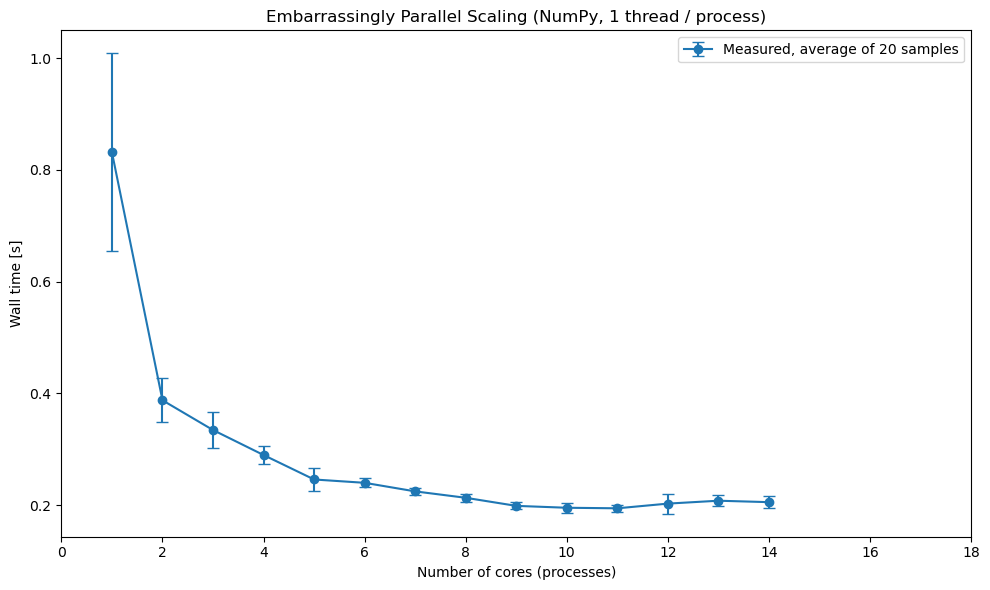

The scaling is not linear and far from perfect! Also, after 8 CPUs it flattens, hinting that the execution time is not dominated by the computation time at a certain point


In [4]:
# Set up 
import os

# MUST be set BEFORE NumPy import
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"

# =========================
# IMPORTS
# =========================
import numpy as np
import multiprocessing
from pathos.multiprocessing import ProcessingPool
import time
import matplotlib.pyplot as plt

# =========================
# WORKLOAD (CPU-BOUND)
# =========================

def intensive_task(x, y):
    """Heavy scalar computation to justify multiprocessing"""
    z = x
    for _ in range(5000):
        z = z * y + 12345.67 * ( (z * y ) / 4.8637)
        z = z**2 * (y+ 3857.296) **3
        z = z**(y**(-3))
        z = ((z**y)**z)**(z*y)**3
        z = ((z**y)**z)**(z*y)**3
    return z

    
'''
def intensive_task(a,b):
    return (a*b)**3
'''
# =========================
# DATA
# =========================
N = 200
a = np.random.uniform(1e16, 1e17, N)
b = np.random.uniform(1e16, 1e17, N)

print(f"Total logical CPUs available: {multiprocessing.cpu_count()}")

# =========================
# BENCHMARK
# =========================
max_cores = min(14, multiprocessing.cpu_count())
n_repeats = 20

times = []
stds = []

for n_cores in range(1, max_cores + 1):

    samples = []

    for _ in range(n_repeats):
        t0 = time.perf_counter()

        # Proper pool lifecycle management
        with ProcessingPool(nodes=n_cores) as pool:
            list(pool.imap(intensive_task, a, b))

        samples.append(time.perf_counter() - t0)

    avg = np.mean(samples)
    err = np.std(samples)

    times.append(avg)
    stds.append(err)

    print(f"Cores: {n_cores:2d} | Time: {avg:.3f} ± {err:.3f} s")

# =========================
# PLOT
# =========================
cores = np.arange(1, max_cores + 1)

plt.figure(figsize=(10, 6))
plt.errorbar(cores, times, yerr=stds, fmt='o-', capsize=4, label=f"Measured, average of {n_repeats} samples")


plt.xlim(0,18)
plt.xlabel("Number of cores (processes)")
plt.ylabel("Wall time [s]")
plt.title("Embarrassingly Parallel Scaling (NumPy, 1 thread / process)")
plt.legend()
plt.tight_layout()
plt.show()

print(f"The scaling is not linear and far from perfect! Also, after 8 CPUs it flattens, hinting that the execution time is not dominated by the computation time at a certain point")
